# Продвинутое машинное обучение: ДЗ 1

## Часть I: О теореме Байеса

1. Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить


#### Ответ:
Получается несколько событий:
- A - ответчик невиновен
- B - ответчик имеет редкую группу крови
- C - ответчик виновен
- D - не имеет редкую группу крови

Ошибка прокурора состоит в том, чтобы он предположил, что условная вероятность появления события C, при условии, что B произошло $P(C/B)$ = 1 - (условная вероятность появления события B, при условии, что A произошло $P(B/A)$).

Но он не оценил условную вероятность появления события A, при условии, что B произошло $p(A/B)$ и тогда при расчете условной вероятности того, что ответчик виновен, при условии наличи редкой группы крови $p(C/B) = 1 - p(A/B)$ ответ дал бы корректный результат

2. Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

#### Ответ:
Адвокат не прав, так как он считает вероятность совершения убийства среди людей, которые имеют редкую группу крови, при это не учитывает всех остальных людей. Получается, что адвокат должен был оценить полную вероятность совершения убийства среди всех людей.

3. Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


Апостериорная вероятность после положительного теста: 0.161017
Апостериорная вероятность после отрицательного теста: 0.000531


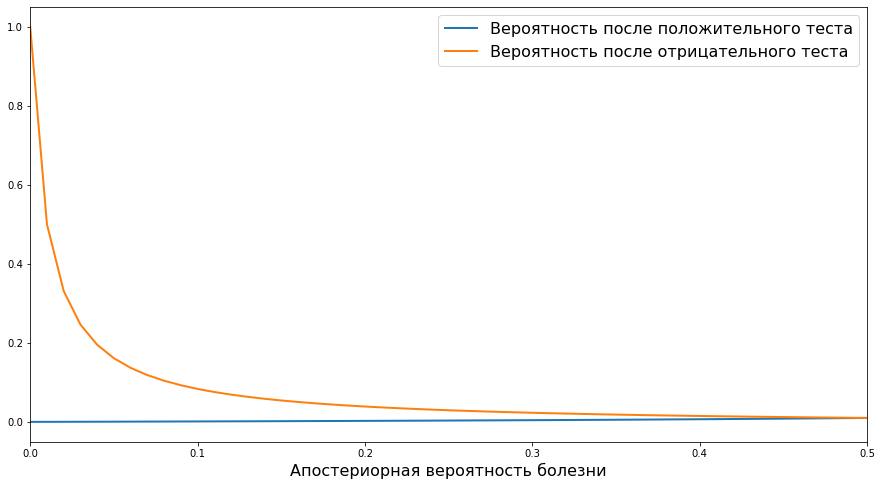

In [1]:
import matplotlib.pyplot as plt
import numpy as np


figsize = (15,8)
legend_fontsize = 16

# prior_prob - вероятность того, что человек болен
# (1 - prior_prob) - вероятность того, что человек не болен

def compute_posterior(data, prior_prob=0.01, test_success=0.95):
    
    if data == 1:
        return (prior_prob * test_success) / (prior_prob * test_success + (1 - prior_prob) * (1 - test_success))
    elif data == 0:
        return (prior_prob * (1 - test_success)) / (prior_prob * (1 - test_success) + (1 - prior_prob) * test_success)
    else:
        return None

print("Апостериорная вероятность после положительного теста: %.6f" % compute_posterior(1))
print("Апостериорная вероятность после отрицательного теста: %.6f" % compute_posterior(0))

vector_posterior = np.vectorize(compute_posterior, excluded=['data', 'test_success'])
xs = np.arange(0, 1, 0.01)
ys_one = vector_posterior(1, test_success=xs)
ys_zero = vector_posterior(0, test_success=xs)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, ys_one, linewidth=2, label=r'Вероятность после положительного теста')
ax.plot(xs, ys_zero, linewidth=2, label='Вероятность после отрицательного теста')
ax.set_xlim((0.0, 0.5))
ax.set_xlabel('Апостериорная вероятность болезни', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)
plt.show()

#### Ответ:
Судя по графику, мы должны менять показатель false negatives (когда тест выдаёт отрицательный результат у больного).
На графике ниже диагонали значения вероятности выше 0.4, т.е. чтобы как-то верить тесту, вероятность болезни должна превышать вероятность ошибки теста, то есть для диагностики нужен очень точный тест и большое количество тестов.

## Часть II: О линейной регрессии

1. Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

In [2]:
import pandas as pd

# загружаем данные
data_covid = pd.read_csv('owid-covid-data.csv')
# переводим столбец даты в формат даты
data_covid.date = pd.to_datetime(data_covid.date)
# выбираем Россию и дату с 3 марта 2020 года
data_covid = data_covid.query("location == 'Russia' & date >= '2020-03-03'")
# заменяем 0 в 1
data_covid.new_cases = data_covid.new_cases.replace(0.0, 1)
# нумеруем по порядке данные
data_covid.reset_index(drop=True, inplace=True)
# формируем целевую переменную
target_data_covid = data_covid[['total_cases', 'new_cases']]
# удаляем столбцы меток из исходных данных
data_covid_all_russia = data_covid.copy()
data_covid.drop(['total_cases', 'new_cases'], axis=1, inplace=True)
# добавляем данные по дням
data_covid['number_day'] = list(data_covid.index)
# зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта;
X_train, y_train = data_covid[:50], target_data_covid[:50]

2. Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем:
- 2.1. Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

- 2.2 Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

- 2.3 Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).


### Решение пукнта 2 и 2.1

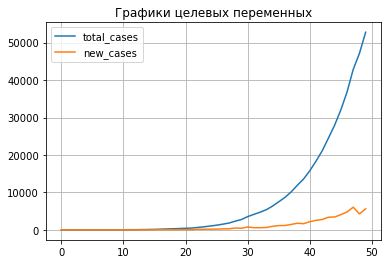

In [3]:
# строим графики целевой переменной total_cases
plt.plot(range(y_train.shape[0]), y_train.total_cases, label='total_cases')
# строим графики целевой переменной new_cases
plt.plot(range(y_train.shape[0]), y_train.new_cases, label='new_cases')
plt.title("Графики целевых переменных")
plt.grid(True)
plt.legend()
plt.show()

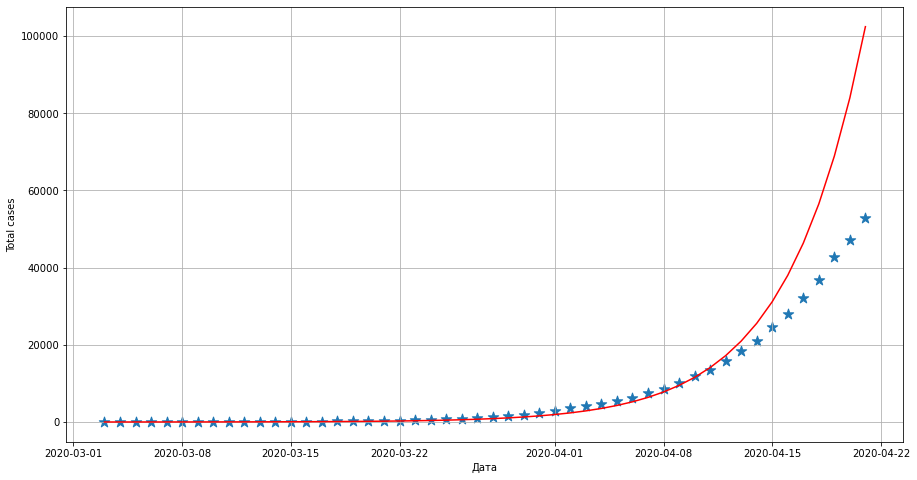

In [4]:
from sklearn.linear_model import LinearRegression

# Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших:
# y ~ exp(линейная функция от x), где x — номер текущего дня.

linear_regression = LinearRegression()
linear_regression.fit(X_train["number_day"].values.reshape(-1, 1), np.log(y_train.total_cases))
predict_data = linear_regression.predict(X_train["number_day"].values.reshape(-1, 1))

## отрисовываем графики
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(X_train["date"], np.exp(predict_data), label="Predicted", color='r')
ax.scatter(X_train["date"], y_train.total_cases, marker='*', s=120, label="Правильный ответ")
plt.xlabel("Дата")
plt.ylabel("Total cases")
plt.grid(True)
plt.show()

### Решение пукнта 2.2

In [5]:
from sklearn.metrics import mean_squared_error

# Оценим дисперсию шума данных
sigma_noise = mean_squared_error(np.log(y_train.total_cases), predict_data)
# строим общую матрицу данных
all_matrix = np.column_stack([np.ones(X_train.shape[0]), X_train["number_day"]])

#
def bayesian_update(mu, sigma, x, y, sigma_noise):
    """Функция для обновления параметров."""
    sigma_n = np.linalg.inv(np.linalg.inv(sigma) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x), x))
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x), y))
    return mu_n, sigma_n

# обновляем значений mu и sigma
mu, sigma = bayesian_update(np.array([0, 0]), 10000*np.array([[1, 0], [0, 1]]),
                            all_matrix, np.log(y_train.total_cases), sigma_noise)

# апостериорное распределение параметров модели
print("Мат. ожидание:", mu)
print("Дисперсия:", sigma)

Мат. ожидание: [1.82073694 0.19829092]
Дисперсия: [[ 1.15248887e-03 -3.49239051e-05]
 [-3.49239051e-05  1.42546555e-06]]


### Решение пукнта 2.3

In [6]:
# Посэмплируем много разных экспонент и постром графики
def myplot_sample_lines(mu, sigma, all_matrix, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)
    for w in my_w:
        plt.plot(X_train["number_day"].values, np.exp(all_matrix.dot(w)), 'k-', lw=.4)
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)

Text(0.5, 1.0, 'Сэмплы экспонент')

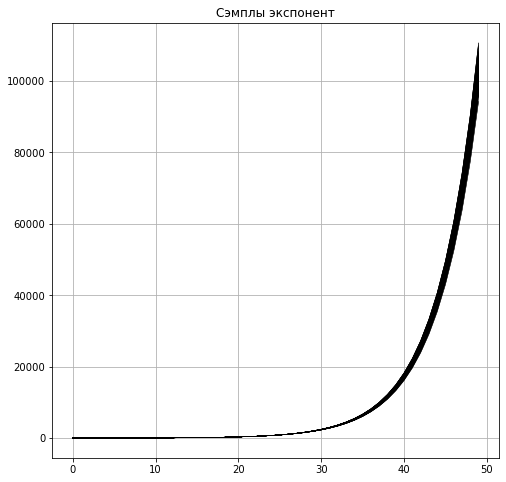

In [7]:
# Строим сэмплы экспонент
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
myplot_sample_lines(mu, sigma, all_matrix, 200)
plt.grid(True)
plt.title("Сэмплы экспонент")

In [8]:
# определим значения для случаев коронавируса в России к 1 мая 2020 года, к 1 июня и к 1 сентября
list_data_covid_value, list_data_covid_value_label = [], []
list_data = ['2020-05-01', '2020-06-01', '2020-09-01']
for data_ls in list_data:
    new_data_cov = data_covid_all_russia[data_covid_all_russia.date == data_ls]
    list_data_covid_value.append(new_data_cov.index[0])
    list_data_covid_value_label.append(new_data_cov.total_cases.values[0])

In [9]:
# оценим результаты данных по ковид для России за разные месяца
predict_data_matrix = np.column_stack([np.ones(3), list_data_covid_value])
# сгенерируем сэмплы
w = np.random.multivariate_normal(mu, sigma, 200)
result_predict_data = np.exp(w.dot(predict_data_matrix.T))

In [10]:
# выводим результаты
print(f"""Предсказанные значения для случаев коронавируса в России к 1 мая 2020 года: {int(np.median(result_predict_data[:, 0]))}, реальное значение: {int(list_data_covid_value_label[0])}\n
Предсказанные значения для случаев коронавируса в России к 1 июня 2020 года: {int(np.median(result_predict_data[:, 1]))}, реальное значение: {int(list_data_covid_value_label[1])}\n
Предсказанные значения для случаев коронавируса в России к 1 сентября 2020 года: {int(np.median(result_predict_data[:, 2]))}, реальное значение: {int(list_data_covid_value_label[2])}""")

Предсказанные значения для случаев коронавируса в России к 1 мая 2020 года: 744240, реальное значение: 114431

Предсказанные значения для случаев коронавируса в России к 1 июня 2020 года: 347610455, реальное значение: 414328

Предсказанные значения для случаев коронавируса в России к 1 сентября 2020 года: 29045226143501184, реальное значение: 997072


3. Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана:
![title](formula.png)
![title](viz.png)

Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t.
- 3.1. Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.
- 3.2. Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.
- 3.3. Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?


### Решение пукнта 3.1

Коэффициенты с 5 признаками: -63704.2478 -58569.4204 -58729.3921 -55829.3346 -20368.1431


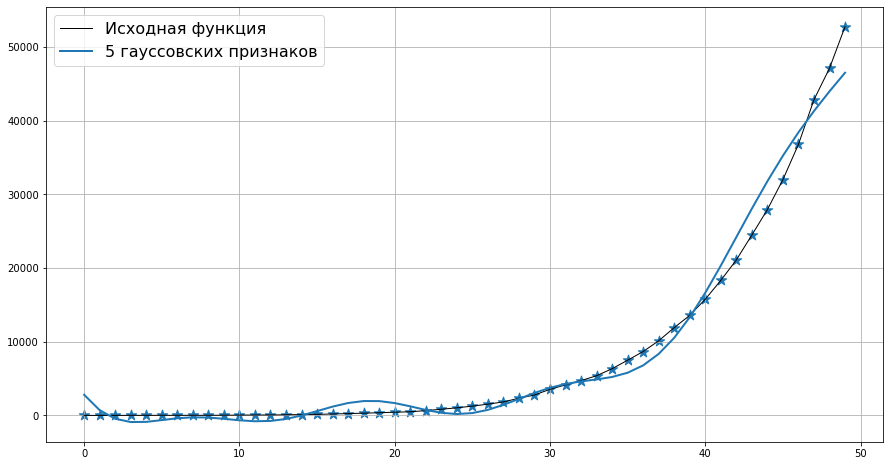

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

nums_gauss = [5, ]
gauss_xd, gauss_yd = X_train["number_day"].values, y_train.total_cases.values

class GaussianFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, N, width_factor=.5):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.scatter(gauss_xd, gauss_yd, marker='*', s=120)
ax.plot(gauss_xd, gauss_yd, linewidth=1, label="Исходная функция", color="black")

for num_gauss in nums_gauss:
    gauss_model = make_pipeline(GaussianFeatures(num_gauss),
                                LinearRegression())
    gauss_model.fit(gauss_xd.reshape(-1, 1), gauss_yd)
    yfit = gauss_model.predict(gauss_xd.reshape(-1, 1))
    print("Коэффициенты с %d признаками: %s" % (num_gauss, " ".join(["%.4f" % x for x in gauss_model.get_params()['linearregression'].coef_])))
    ax.plot(gauss_xd, yfit, linewidth=2, label="%d гауссовских признак%s" % (num_gauss, "а" if num_gauss < 5 else "ов") )

ax.legend(loc="upper left", fontsize=legend_fontsize)
plt.grid(True)
plt.show()

### Решение пукнта 3.2

In [12]:
# получаем предсказанные данные
predict_data_gauss = gauss_model.predict(gauss_xd.reshape(-1, 1))
# добавляем шум
sigma_noise = mean_squared_error(gauss_yd, predict_data_gauss)
# строим общую матрицу данных
all_matrix_gauss = np.column_stack([np.ones(X_train.shape[0]), gauss_xd])
mu, sigma = bayesian_update(np.array([0, 0]), 0.5*np.array([[1, 0], [0, 1]]),
                            all_matrix_gauss, gauss_yd, sigma_noise)
# апостериорное распределение параметров модели
print("Мат. ожидание:", mu)
print("Дисперсия:", sigma)

Мат. ожидание: [2.40194632e-08 1.03249653e-06]
Дисперсия: [[ 5.00000000e-01 -3.58719731e-11]
 [-3.58719731e-11  4.99999999e-01]]


### Решение пукнта 3.3

In [13]:
# Посэмплируем много разных экспонент и постром графики
def myplot_sample_lines(mu, sigma, all_matrix_gauss, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)
    for w in abs(my_w):
        plt.plot(gauss_xd, gauss_model.predict(all_matrix_gauss.dot(w).reshape(-1, 1)), 'k-', lw=.4)
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)

Text(0.5, 1.0, 'Сэмплы сигмоид')

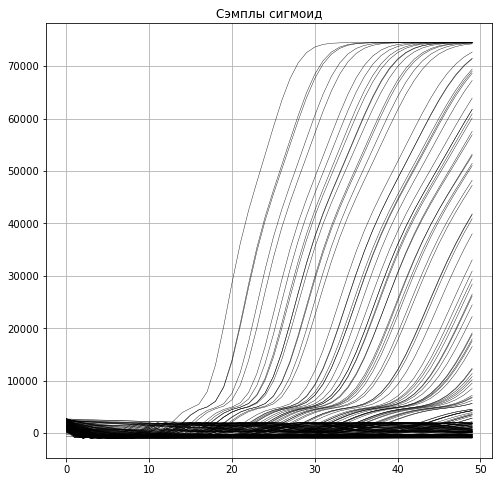

In [14]:
# Строим сэмплы экспонент
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
myplot_sample_lines(mu, sigma, all_matrix_gauss, 200)
plt.grid(True)
plt.title("Сэмплы сигмоид")

In [15]:
# сгенерируем сэмплы
w = np.random.multivariate_normal(mu, sigma, 200)
result_predict_data = w.dot(predict_data_matrix.T)
# выводим результаты
# выводим результаты
predict_1 = abs(gauss_model.predict(result_predict_data[:, 0].reshape(-1, 1)))
predict_2 = abs(gauss_model.predict(result_predict_data[:, 1].reshape(-1, 1)))
predict_3 = abs(gauss_model.predict(result_predict_data[:, 2].reshape(-1, 1)))
print(f"""Предсказанные значения для случаев коронавируса в России к 1 мая 2020 года: {int(np.median(predict_1))}, реальное значение: {int(list_data_covid_value_label[0])}
Предсказанные значения для случаев коронавируса в России к 1 мая 2020 года (квантиль 10%): {np.quantile(predict_1, 0.1)}
Предсказанные значения для случаев коронавируса в России к 1 мая 2020 года (квантиль 90%): {np.quantile(predict_1, 0.9)}\n
Предсказанные значения для случаев коронавируса в России к 1 июня 2020 года: {int(np.median(predict_2))}, реальное значение: {int(list_data_covid_value_label[1])}
Предсказанные значения для случаев коронавируса в России к 1 июня 2020 года (квантиль 10%): {np.quantile(predict_2, 0.1)}
Предсказанные значения для случаев коронавируса в России к 1 июня 2020 года (квантиль 90%): {np.quantile(predict_2, 0.9)}\n
Предсказанные значения для случаев коронавируса в России к 1 сентября 2020 года: {int(np.median(predict_3))}, реальное значение: {int(list_data_covid_value_label[2])}
Предсказанные значения для случаев коронавируса в России к 1 сентября 2020 года (квантиль 10%): {np.quantile(predict_3, 0.1)}
Предсказанные значения для случаев коронавируса в России к 1 сентября 2020 года (квантиль 90%): {np.quantile(predict_3, 0.9)}""")

Предсказанные значения для случаев коронавируса в России к 1 мая 2020 года: 52692, реальное значение: 114431
Предсказанные значения для случаев коронавируса в России к 1 мая 2020 года (квантиль 10%): 509.68193483821386
Предсказанные значения для случаев коронавируса в России к 1 мая 2020 года (квантиль 90%): 74458.42307727065

Предсказанные значения для случаев коронавируса в России к 1 июня 2020 года: 74183, реальное значение: 414328
Предсказанные значения для случаев коронавируса в России к 1 июня 2020 года (квантиль 10%): 691.8081277974766
Предсказанные значения для случаев коронавируса в России к 1 июня 2020 года (квантиль 90%): 74458.42307727065

Предсказанные значения для случаев коронавируса в России к 1 сентября 2020 года: 74458, реальное значение: 997072
Предсказанные значения для случаев коронавируса в России к 1 сентября 2020 года (квантиль 10%): 1739.1379900329719
Предсказанные значения для случаев коронавируса в России к 1 сентября 2020 года (квантиль 90%): 74458.423077270

4. Бонус: проведите такой же анализ для других стран (здесь придётся руками подобрать дни начала моделирования — коронавирус приходил в разные страны в разное время). Насколько разные параметры получаются? Можно ли разделить страны на кластеры (хотя бы чисто визуально) в зависимости от этих параметров?

5. Что вы поняли из этого упражнения? Что можно сказать про коронавирус по итогам такого моделирования? Как принять решение, например, о том, нужно ли вводить карантин?

#### Ответ:
1. Из этого упражнения становится понятно, что нужно учитывать апостериорные распределения вероятностей наряду с априорными для точного моделирования зависимостей.
2. Короновирус - крайне опасное заболевание, которое стремительно растет по экспоненциальному закону распределения.
3. Для принятия решения о необходимости введения карантина нужно определять темпы роста заболеваемости, определять этап развития болезни на данный момент и, если темпы заболеваемости значительно превысили долю заболеваемости относительно числа людей в городе/стране, то необходимо вводить карантин.